In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
par_ppn=100 #保本票据的本金
par_bond=100 #无风险零息债券面值
price_bond=96 #无风险零息债券价格
price_call=0.4 #欧式看涨期权报价
K=5.0 #期权行权价格

In [3]:
N_bond=par_ppn/par_bond #购买的无风险零息债券数量
N_call=(par_ppn-N_bond*price_bond)/price_call #购买的欧式看涨期权数量
print('构建1份保本票据需要购买的无风险零息债券数量',N_bond)
print('构建1分保本票据需要购买的欧式看涨期权数量',N_call)

构建1份保本票据需要购买的无风险零息债券数量 1.0
构建1分保本票据需要购买的欧式看涨期权数量 10.0


In [4]:
price_z_list=np.linspace(3,7,120) #创建期权到期时z股票价格等差数列

In [5]:
profit_call=np.maximum(price_z_list-K,0)

In [6]:
profit_ppn=N_bond*par_bond+N_call*profit_call-par_ppn #保本票据到期的收益金额

In [7]:
return_ppn=profit_ppn/par_ppn #保本票据到期的收益率

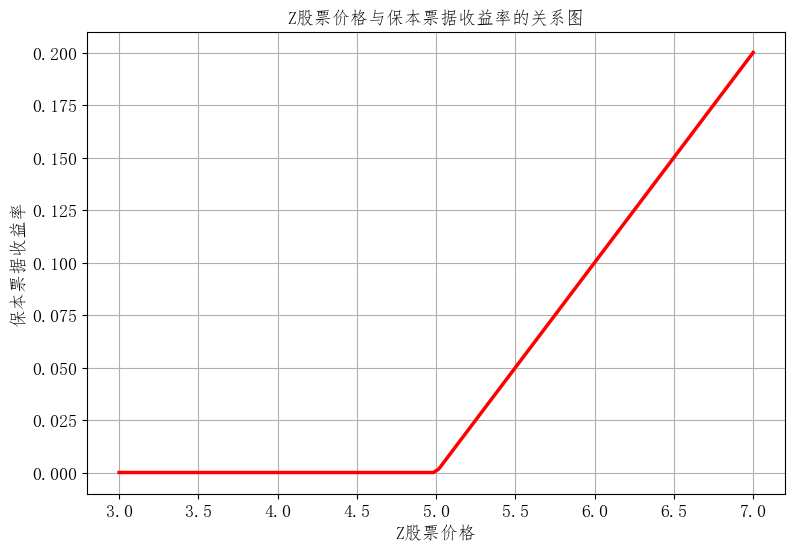

In [8]:
plt.figure(figsize=(9,6))
plt.plot(price_z_list,return_ppn,'r-',lw=2.5)
plt.xlabel(u'Z股票价格',fontsize=13)
plt.ylabel(u'保本票据收益率',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'Z股票价格与保本票据收益率的关系图',fontsize=13)
plt.grid()
plt.show()

In [9]:
par_PPN=1e8 #保本票据的面值
par_SC=100 #18四川01债券的面值
coupon=0.0373 #18四川01债券的票面利率

In [10]:
price_SC=102.2682 #2020年8月24日18四川01债券的价格
price_opt=0.2230 #2020年8月24日沪深300ETF认购期权的价格
price_300ETF=4.8207 #2020年8月24日沪深300ETF基金的净值
K_300ETF=5.0 #期权行权价格
price_HS300=4755.85 #2020年8月24日沪深300指数的收盘价

In [11]:
N1=10 #债券的交易单位（10张）
N2=10000 #每张期权合约单位（10000份沪深300ETF基金）

In [12]:
cashflow_SC=par_SC*(1+coupon) #18四川01债券到期日的本息

In [13]:
from math import ceil

In [14]:
N_SC=N1*ceil(par_PPN/(N1*cashflow_SC)) #计算债券数量（10张的整数倍）
print('购买18四川01债券数量（张）',N_SC)

购买18四川01债券数量（张） 964050


In [15]:
N_opt=(par_PPN-price_SC*N_SC)/(price_opt*N2)  #计算期权合约数量
N_opt=int(N_opt)
print('购买300ETF购3月5000期权合约数量（张）',N_opt)

购买300ETF购3月5000期权合约数量（张） 631


In [16]:
cash=par_PPN-price_SC*N_SC-N_opt*price_opt*N2 #未购买债券和期权的剩余现金
print('保本票据本金未用于购买债券和期权的剩余现金',round(cash,2))

保本票据本金未用于购买债券和期权的剩余现金 1211.79


In [17]:
K_HS300=K_300ETF*price_HS300/price_300ETF
print('恰好等于期权行权价格的沪深300指数点位',round(K_HS300,2))

恰好等于期权行权价格的沪深300指数点位 4932.74


In [18]:
HS300_chg=np.array([0.05,0.1,0.2,0.3]) #创建沪深300指数涨幅的数组

In [19]:
profit_opt=N_opt*N2*np.maximum(price_300ETF*(1+HS300_chg)-K_300ETF,0) #计算期权收益

In [20]:
profit_PPN=cashflow_SC*N_SC+cash+profit_opt-par_PPN #计算保本票据的收益金额

In [21]:
R_PPN=profit_PPN/par_PPN  #计算保本票据收益率

In [22]:
print('到期日沪深300指数上涨5%时保本票据收益率',round(R_PPN[0],6))
print('到期日沪深300指数上涨10%时保本票据收益率',round(R_PPN[1],6))
print('到期日沪深300指数上涨20%时保本票据收益率',round(R_PPN[2],6))
print('到期日沪深300指数上涨30%时保本票据收益率',round(R_PPN[-1],6))

到期日沪深300指数上涨5%时保本票据收益率 0.003917
到期日沪深300指数上涨10%时保本票据收益率 0.019126
到期日沪深300指数上涨20%时保本票据收益率 0.049545
到期日沪深300指数上涨30%时保本票据收益率 0.079963


In [23]:
HS300_list=np.linspace(4000,7000,500) #保本票据到期时沪深300指数的等差数列

In [24]:
price_300ETF_list=HS300_list*(price_300ETF/price_HS300)  #沪深300ETF基金净值数组

In [25]:
profit_opt_list=N_opt*N2*np.maximum(price_300ETF_list-K_300ETF,0) #期权收益金额数组

In [26]:
profit_PPN_list=cashflow_SC*N_SC+cash+profit_opt_list-par_PPN #保本票据的收益金额数组

In [27]:
R_PPN_list=profit_opt_list/par_PPN

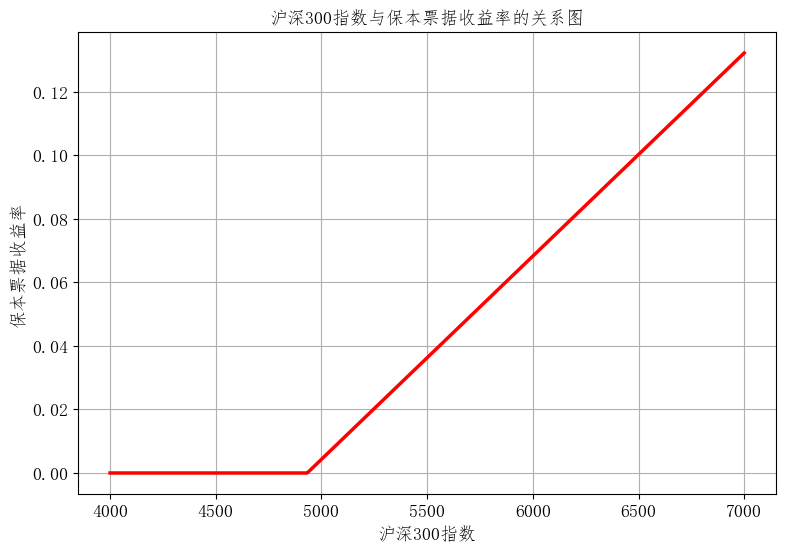

In [28]:
plt.figure(figsize=(9,6))
plt.plot(HS300_list,R_PPN_list,'r-',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'保本票据收益率',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与保本票据收益率的关系图',fontsize=13)
plt.grid()
plt.show()

In [29]:
C=0.2065 #策略构建日（2020年6月1日）看涨期权价格
K=4.0 #看涨期权行权价格
S0_ETF=4.0364 #策略构建日沪深300ETF基金净值
S0_index=3971.34 #策略构建日沪深300指数收盘价

In [30]:
St_index=np.linspace(3000,5000,500) #期权到期日沪深300指数的等差数列
St_ETF=S0_ETF*St_index/S0_index #对应不同沪深300指数的沪深300ETF基金净值

In [31]:
N_ETF=10000 #沪深300ETF基金空头头寸数量
N_call=1 #沪深300ETF认购期权多头头寸数量
N_underlying=10000 #1张期权基础资产是10000份基金

In [32]:
profit_ETF_short=-N_ETF*(St_ETF-S0_ETF) #期权到期日沪深300ETF基金空头头寸的收益

In [33]:
profit_call_long=N_call*N_underlying*(np.maximum(St_ETF-K,0)-C) #期权到期日沪深300认购期权多头头寸的收益

In [34]:
profit_covcall_long=profit_ETF_short+profit_call_long #期权到期日买入备兑看涨期权的收益

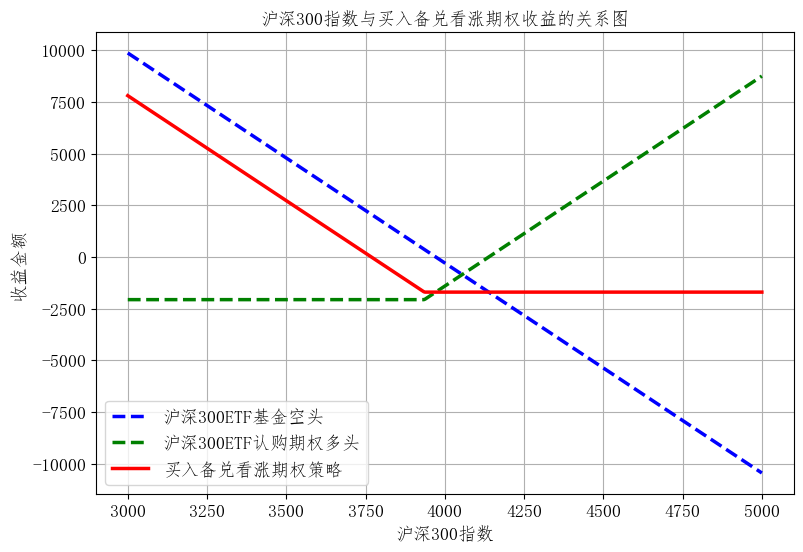

In [35]:
plt.figure(figsize=(9,6))
plt.plot(St_index,profit_ETF_short,'b--',label=u'沪深300ETF基金空头',lw=2.5)
plt.plot(St_index,profit_call_long,'g--',label=u'沪深300ETF认购期权多头',lw=2.5)
plt.plot(St_index,profit_covcall_long,'r-',label=u'买入备兑看涨期权策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与买入备兑看涨期权收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [36]:
C=0.201 #策略构建日看涨期权价格
K=4.3
S0_ETF=4.3429 #策略构建日沪深300ETF基金净值
S0_index=4247.78 #策略构建日沪深300指数收盘价

In [37]:
St_index=np.linspace(3500,5500,500)
St_ETF=S0_ETF*St_index/S0_index

In [38]:
profit_ETF_long=N_ETF*(St_ETF-S0_ETF) #期权到期日沪深300ETF基金多头头寸的收益

In [39]:
profit_call_short=-N_call*N_underlying*(np.maximum(St_ETF-K,0)-C) #期权到期日沪深300ETF认购期权空头头寸的收益

In [40]:
profit_covcall_short=profit_ETF_long+profit_call_short

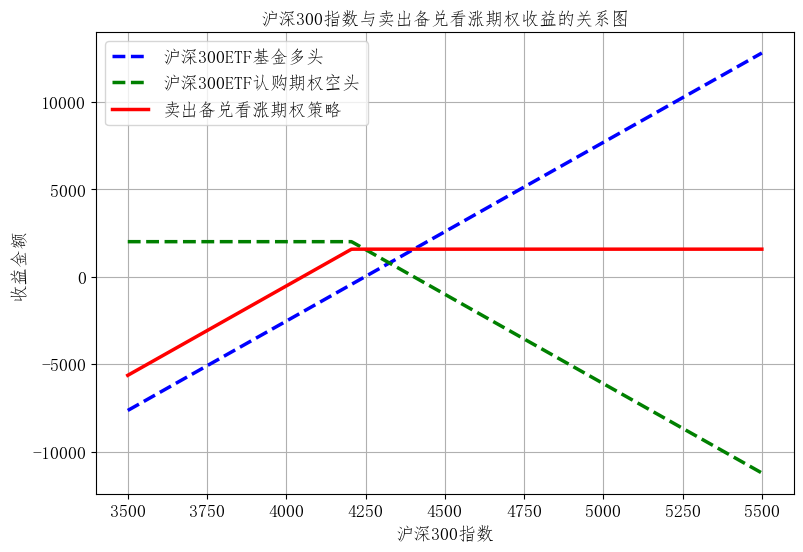

In [41]:
plt.figure(figsize=(9,6))
plt.plot(St_index,profit_ETF_long,'b--',label=u'沪深300ETF基金多头',lw=2.5)
plt.plot(St_index,profit_call_short,'g--',label=u'沪深300ETF认购期权空头',lw=2.5)
plt.plot(St_index,profit_covcall_short,'r-',label=u'卖出备兑看涨期权策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与卖出备兑看涨期权收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [42]:
P=0.4416
K=4.9
S0_ETF=4.9168
S0_index=4771.31

In [43]:
St_index=np.linspace(4000,6000,500)
St_ETF=S0_ETF*St_index/S0_index

In [44]:
N_put=1 #沪深300ETF认沽期权多头头寸的数量

In [45]:
profit_ETF_long=N_ETF*(St_ETF-S0_ETF)

In [46]:
profit_put_long=N_put*N_underlying*(np.maximum(K-St_ETF,0)-P)

In [47]:
profit_protput_long=profit_ETF_long+profit_put_long

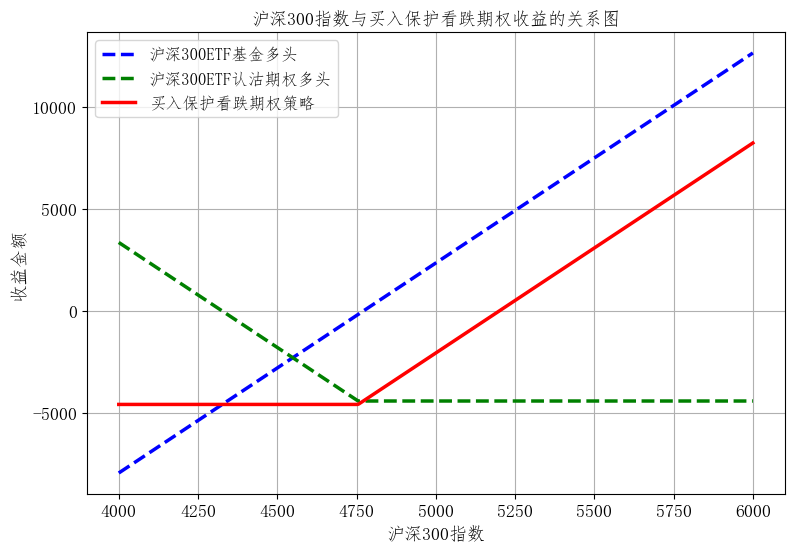

In [48]:
plt.figure(figsize=(9,6))
plt.plot(St_index,profit_ETF_long,'b--',label=u'沪深300ETF基金多头',lw=2.5)
plt.plot(St_index,profit_put_long,'g--',label=u'沪深300ETF认沽期权多头',lw=2.5)
plt.plot(St_index,profit_protput_long,'r-',label=u'买入保护看跌期权策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与买入保护看跌期权收益的关系图',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [49]:
P=0.4211
K=5.0
S0_ETF=4.9966
SO_index=4842.12

In [50]:
St_index=np.linspace(3800,5800,500)
St_ETF=S0_ETF*St_index/S0_index

In [51]:
profit_ETF_short=-N_ETF*(St_ETF-S0_ETF)

In [52]:
profit_put_short=-N_put*N_underlying*(np.maximum(K-St_ETF,0)-P)

In [53]:
profit_protput_short=profit_ETF_short+profit_put_short

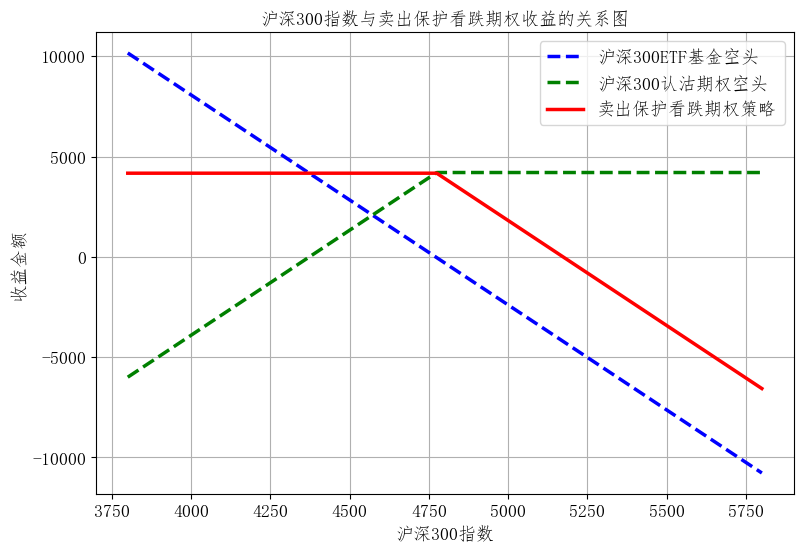

In [54]:
plt.figure(figsize=(9,6))
plt.plot(St_index,profit_ETF_short,'b--',label=u'沪深300ETF基金空头',lw=2.5)
plt.plot(St_index,profit_put_short,'g--',label=u'沪深300认沽期权空头',lw=2.5)
plt.plot(St_index,profit_protput_short,'r-',label=u'卖出保护看跌期权策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与卖出保护看跌期权收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [55]:
price=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第13章/沪深300ETF期权价格与沪深300ETF基金净值（2019年12月至2020年6月）.xlsx',
                   sheet_name="Sheet1",header=0,index_col=0)

In [56]:
price.index=pd.DatetimeIndex(price.index) #将数据框的行索引转换为datetime格式

In [57]:
price.head()

,看涨期权,看跌期权,沪深300ETF
日期,,,
2019-12-23,0.2512,0.1251,4.029
2019-12-24,0.2415,0.1119,4.052
2019-12-25,0.2461,0.1145,4.053
2019-12-26,0.2731,0.1077,4.083
2019-12-27,0.2787,0.1031,4.082


In [58]:
price.tail()

,看涨期权,看跌期权,沪深300ETF
日期,,,
2020-06-18,0.1164,0.0061,4.115
2020-06-19,0.1602,0.0020,4.152
2020-06-22,0.1680,0.0013,4.174
2020-06-23,0.1981,0.0005,4.196
2020-06-24,0.2278,0.0001,4.231


In [59]:
P0_call=price['看涨期权'].iloc[0] #策略构建日看涨期权收盘价
P0_put=price['看跌期权'].iloc[0]
P0_ETF=price['沪深300ETF'].iloc[0]

In [60]:
P0_call

0.2512

In [61]:
profit_call=N_call*N_underlying*(price['看涨期权']-P0_call) #看涨期权的期间收益
profit_put=N_put*N_underlying*(price['看跌期权']-P0_put) #看跌期权的期间收益
profit_ETF=N_underlying*(price['沪深300ETF']-P0_ETF)  #沪深300ETF基金的期间收益

In [62]:
profit_covcall_long=-profit_ETF+profit_call #买入备兑看涨期权策略的期间收益
profit_covcall_short=-profit_covcall_long #卖出备兑看涨期权策略的期间收益
profit_protput_long=profit_put+profit_ETF #买入保护看跌期权策略的期间收益
profit_protput_short=-profit_protput_long #卖出保护看跌期权策略的期间收益

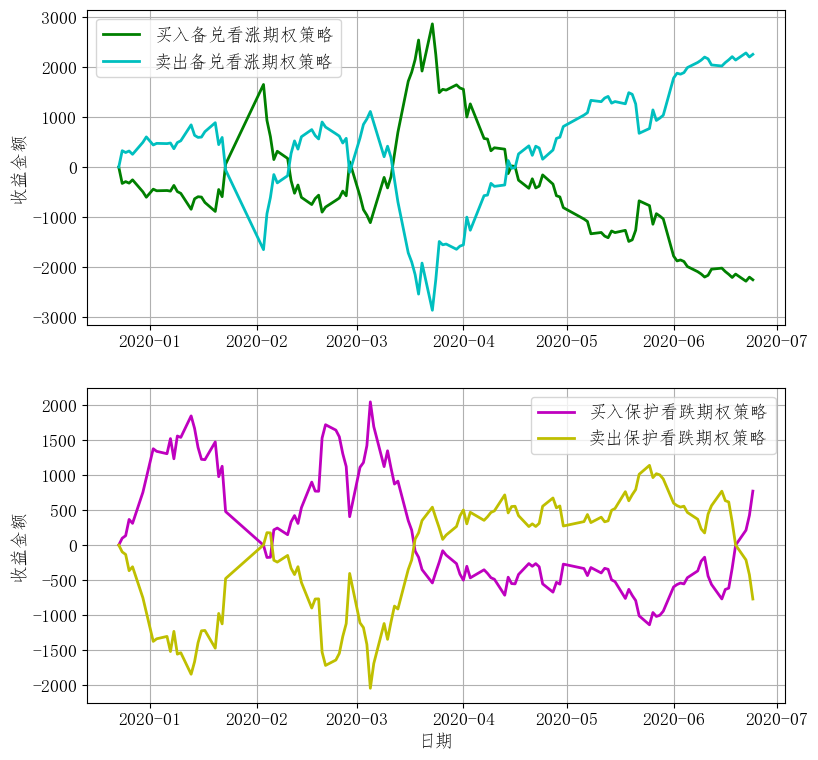

In [63]:
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(profit_covcall_long,'g-',label=u'买入备兑看涨期权策略',lw=2.0)
plt.plot(profit_covcall_short,'c-',label=u'卖出备兑看涨期权策略',lw=2.0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.subplot(2,1,2)
plt.plot(profit_protput_long,'m-',label=u'买入保护看跌期权策略',lw=2.0)
plt.plot(profit_protput_short,'y-',label=u'卖出保护看跌期权策略',lw=2.0)
plt.xticks(fontsize=13)
plt.xlabel(u'日期',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

牛市价差策略

In [64]:
K1 = 4500
K2 = 5000
C1 = 474.4
C2 = 293.0
S0 = 4762.76
St = np.linspace(3500, 6500, 500)  # Shape (500,)
N1 = 1  # Lower strike price option long position
N2 = 1  # Higher strike price option short position
M = 100  # Contract multiplier

In [65]:
profit_C1_long = N1*M*(np.maximum(St-K1,0)-C1)

In [66]:
profit_C2_short = N2 * M * (C2 - np.maximum(St - K2, 0)) 

In [67]:
profit_bullspread=profit_C1_long+profit_C2_short

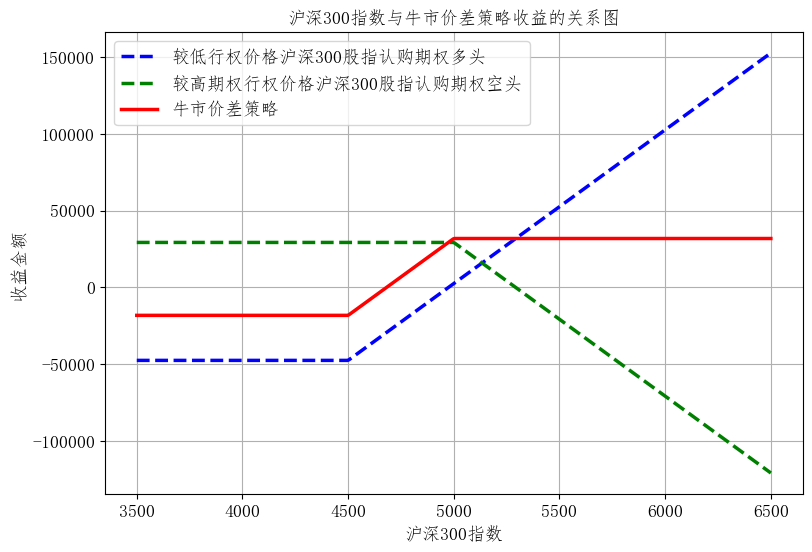

In [68]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C1_long,'b--',label=u'较低行权价格沪深300股指认购期权多头',lw=2.5)
plt.plot(St,profit_C2_short,'g--',label=u'较高期权行权价格沪深300股指认购期权空头',lw=2.5)
plt.plot(St,profit_bullspread,'r-',label=u'牛市价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与牛市价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [69]:
K1=4400
K2=5200
P1=290.0
P2=873.8

In [70]:
S0=4812.76
St=np.linspace(3000,6000,500)

In [71]:
profit_P1_long=N1*M*(np.maximum(K1-St,0)-P1) #期权到期日较低行权价格看跌期权多头头寸的收益
profit_P2_short=N2*M*(P2-np.maximum(K2-St,0)) #期权到期日较高行权价格看跌期权空头头寸的收益

In [72]:
profit_bullspread=profit_P1_long+profit_P2_short

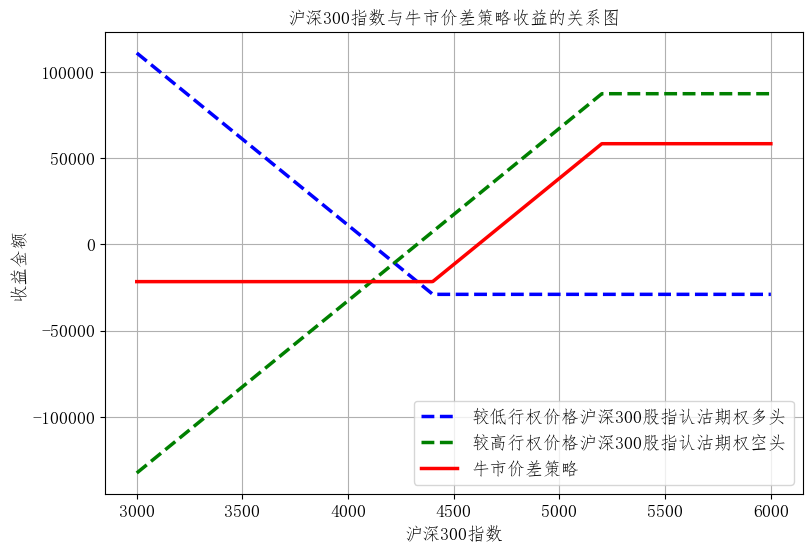

In [73]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_P1_long,'b--',label=u'较低行权价格沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_P2_short,'g--',label=u'较高行权价格沪深300股指认沽期权空头',lw=2.5)
plt.plot(St,profit_bullspread,'r-',label=u'牛市价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与牛市价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [74]:
K1=4500
K2=5400
P1=237.0
P2=818.2

In [75]:
S0=4844.27
St=np.linspace(3400,6400,500)

In [76]:
profit_P1_short=N1*M*(P1-np.maximum(K1-St,0))

In [77]:
profit_P2_long=N2*M*(np.maximum(K2-St,0)-P2)

In [78]:
profit_bearspread=profit_P1_short+profit_P2_long

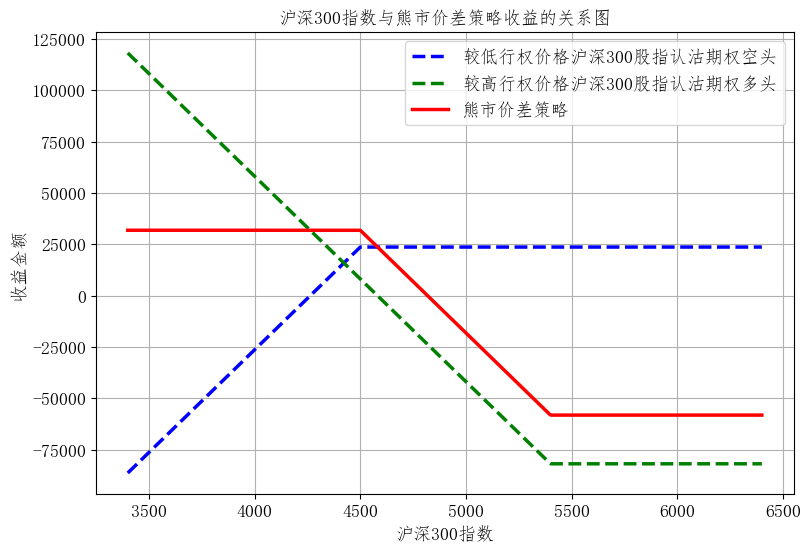

In [79]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_P1_short,'b--',label=u'较低行权价格沪深300股指认沽期权空头',lw=2.5)
plt.plot(St,profit_P2_long,'g--',label=u'较高行权价格沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_bearspread,'r-',label=u'熊市价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与熊市价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [80]:
K1=4300
K2=5200
C1=486.0
C2=152.4
S0=4694.39
St=np.linspace(3300,6200,500)

In [81]:
profit_C1_short=N1*M*(C1-np.maximum(St-K1,0)) #期权到期日较低行权价格看涨期权空头头寸的收益

In [82]:
profit_C2_long=N2*M*(np.maximum(St-K2,0)-C2) #期权到期日较高行权价格看涨期权多头头寸的收益

In [83]:
profit_bearspread=profit_C1_short+profit_C2_long

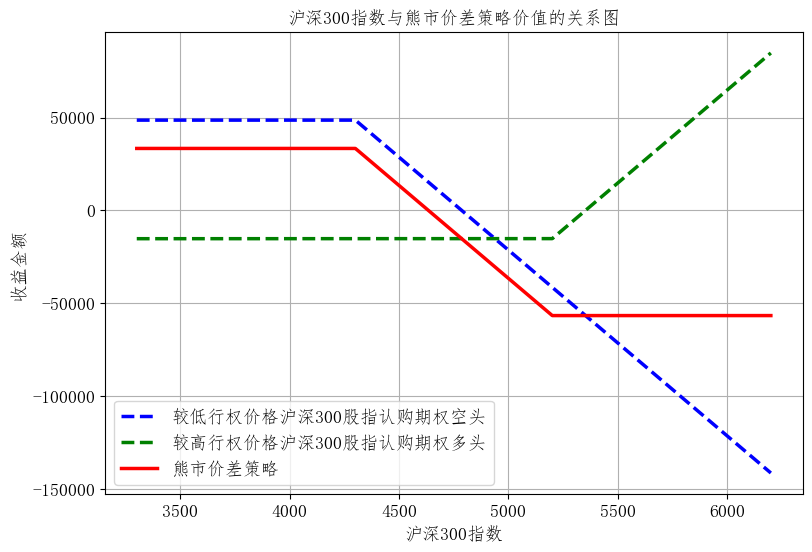

In [84]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C1_short,'b--',label=u'较低行权价格沪深300股指认购期权空头',lw=2.5)
plt.plot(St,profit_C2_long,'g--',label=u'较高行权价格沪深300股指认购期权多头',lw=2.5)
plt.plot(St,profit_bearspread,'r-',label=u'熊市价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与熊市价差策略价值的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

盒式价差策略

In [85]:
K1=4000 #较低的期权行权价格
K2=4600 #较高的期权行权价格
C1=161.6 #较低行权价格的看涨期权价格
C2=33.2 #较高行权价格的看涨期权价格
P1=285.4 #较低行权价格的看跌期权价格
P2=776.0 #较高行权价格的看跌期权价格
S0=4044.38 #策略构建日沪深300指数收盘价
St=np.linspace(3000,5000,500)

In [86]:
profit_C1_long=N1*M*(np.maximum(St-K1,0)-C1) #期权到期日较低行权价格看涨期权多头头寸的收益
profit_P1_short=N1*M*(P1-np.maximum(K1-St,0)) #期权到期日较低行权价格看跌期权空头头寸的收益

In [87]:
profit_C2_short=N2*M*(C2-np.maximum(St-K2,0)) #期权到期日较高行权价格看涨期权空头头寸的收益
profit_P2_long=N2*M*(np.maximum(K2-St,0)-P2) #期权到期日较高行权价格看跌期权多头头寸的收益

In [88]:
profit_boxspread=profit_C1_long+profit_C2_short+profit_P1_short+profit_P2_long

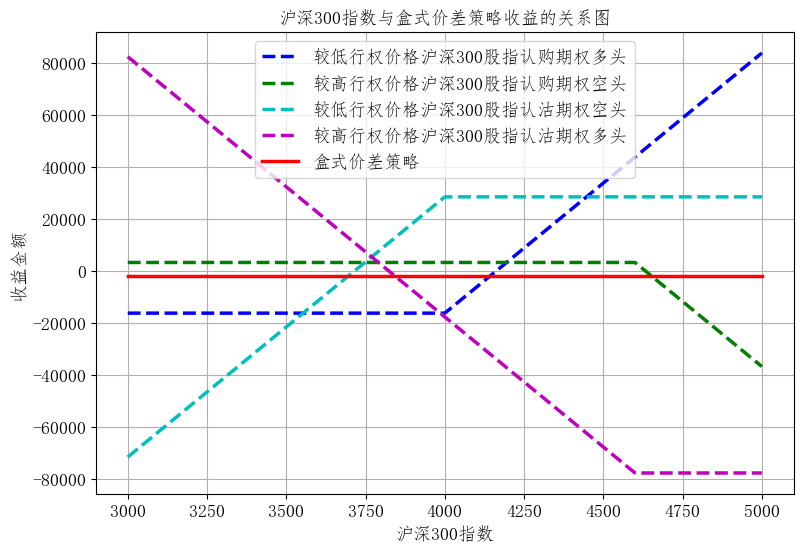

In [89]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C1_long,'b--',label=u'较低行权价格沪深300股指认购期权多头',lw=2.5)
plt.plot(St,profit_C2_short,'g--',label=u'较高行权价格沪深300股指认购期权空头',lw=2.5)
plt.plot(St,profit_P1_short,'c--',label=u'较低行权价格沪深300股指认沽期权空头',lw=2.5)
plt.plot(St,profit_P2_long,'m--',label=u'较高行权价格沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_boxspread,'r-',label=u'盒式价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与盒式价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [90]:
shibor=0.02115
tenor=0.5

In [91]:
PV_boxspread=profit_boxspread[0]*np.exp(-shibor*tenor) #策略构建日该策略的收益现值

In [92]:
print('策略构建日盒式价差策略收益',round(PV_boxspread,2))

策略构建日盒式价差策略收益 -1880.01


In [93]:
K1=4400
K2=4800
K3=5200
C1=571.6
C2=388.6
C3=255.0

In [94]:
S0=4842.12
St=np.linspace(3400,6200,500)

In [95]:
N1=1
N2=2
N3=1

In [96]:
profit_C1_long=N1*M*(np.maximum(St-K1,0)-C1)
profit_C2_short=N2*M*(C2-np.maximum(St-K2,0))
profit_C3_long=N3*M*(np.maximum(St-K3,0)-C3)

In [97]:
profit_buttpread=profit_C1_long+profit_C2_short+profit_C3_long

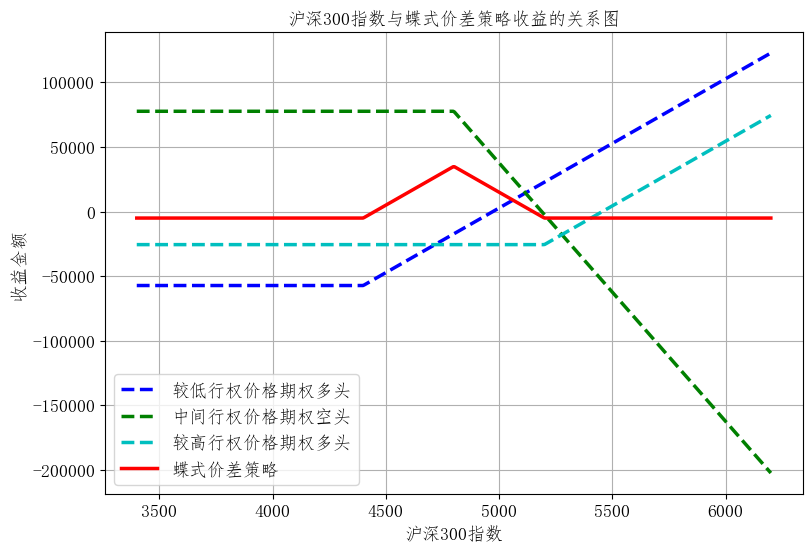

In [98]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C1_long,'b--',label=u'较低行权价格期权多头',lw=2.5)
plt.plot(St,profit_C2_short,'g--',label=u'中间行权价格期权空头',lw=2.5)
plt.plot(St,profit_C3_long,'c--',label=u'较高行权价格期权多头',lw=2.5)
plt.plot(St,profit_buttpread,'r-',label=u'蝶式价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与蝶式价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [99]:
K1=4200
K2=4600
K3=5000
P1=264.2
P2=476.2
P3=748.2

In [100]:
S0=4581.98
St=np.linspace(3200,6000,500)

In [101]:
profit_P1_long=N1*M*(np.maximum(K1-St,0)-P1)
profit_P2_short=N2*M*(P2-np.maximum(K2-St,0))
profit_P3_long=N3*M*(np.maximum(K3-St,0)-P3)

In [102]:
profit_buttpread=profit_P1_long+profit_P2_short+profit_P3_long

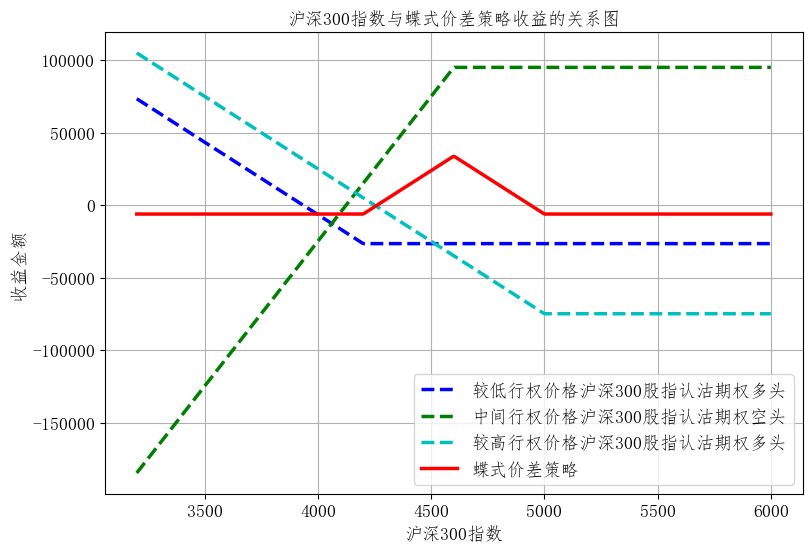

In [103]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_P1_long,'b--',label=u'较低行权价格沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_P2_short,'g--',label=u'中间行权价格沪深300股指认沽期权空头',lw=2.5)
plt.plot(St,profit_P3_long,'c--',label=u'较高行权价格沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_buttpread,'r-',label=u'蝶式价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与蝶式价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

日历价差策略

In [104]:
K_same=4600 #期权行权价格
C1=224.0 #策略构建日较近到期日的看涨期权价格
C2=348.0 #策略构建日较远到期日的看涨期权价格

In [105]:
S0=4584.59
St=np.linspace(3000,6000,500)

In [106]:
N1=1 #较近到期日的期权空头头寸数量
N2=1 #较远到期日的期权多头头寸数量

In [107]:
profit_C1_short=N1*M*(C1-np.maximum(St-K_same,0)) #较近到期日看涨期权空头头寸的收益

In [108]:
def BTM_Nstep(S,K,sigma,r,T,N,types):
    '''定义一个运用N步二叉树模型计算欧式期权价值的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数
    types:代表期权类型'''
    from math import factorial #导入math模块的阶乘函数
    from numpy import exp,maximum,sqrt
    t=T/N
    u=exp(sigma*sqrt(t))
    d=1/u
    p=(exp(r*t)-d)/(u-d)
    N_list=range(0,N+1)
    A=[]
    for j in N_list:
        C_Nj=maximum(S*pow(u,j)*pow(d,N-j)-K,0)
        Num=factorial(N)/(factorial(j)*factorial(N-j)) #到达到期日该节点的实现路径数量
        A.append(Num*pow(p,j)*pow(1-p,N-j)*C_Nj) #在列表尾部每次增加一个新元素
    call=exp(-r*T)*sum(A) #计算看涨期权的期初价值
    put=call+K*np.exp(-r*T)-S
    if types=='call':
        value=call
    else:
        value=put
    return value

In [109]:
tenor=0.5
sigma_index=0.22 #沪深300指数的年化波动率
shibor=0.02922
step=120

In [110]:
Ct=np.ones_like(St)

In [111]:
for i in range(len(Ct)):
    Ct[i]=BTM_Nstep(S=St[i],K=K_same,sigma=sigma_index,r=shibor,T=tenor,N=step,types='call') #计算较远到期日看涨期权的价格

In [112]:
profit_C2_long=N2*M*(Ct-C2) #在策略到期日较远到期日的看涨期权多头头寸收益

In [113]:
profit_calendarpread=profit_C1_short+profit_C2_long

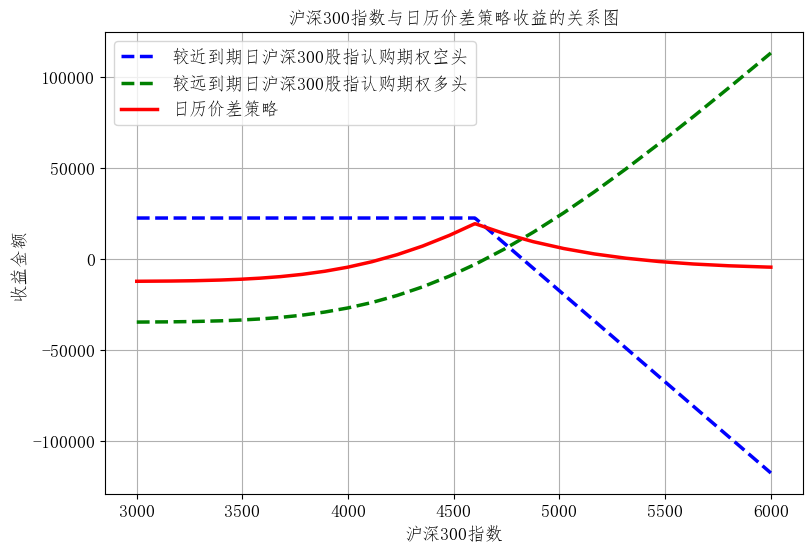

In [114]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C1_short,'b--',label=u'较近到期日沪深300股指认购期权空头',lw=2.5)
plt.plot(St,profit_C2_long,'g--',label=u'较远到期日沪深300股指认购期权多头',lw=2.5)
plt.plot(St,profit_calendarpread,'r-',label=u'日历价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与日历价差策略收益的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [115]:
K_same=5000
P1=597.6
P2=746.4
St=np.linspace(3500,6500,500)

In [116]:
profit_P1_short=N1*M*(P1-np.maximum(K_same-St,0))

In [117]:
Pt=np.ones_like(St)

In [118]:
for i in range(len(Pt)):
    Pt[i]=BTM_Nstep(S=St[i],K=K_same,sigma=sigma_index,r=shibor,T=tenor,N=step,types='put')

In [119]:
profit_P2_long=N2*M*(Pt-P2)

In [120]:
profit_calendarpread=profit_P1_short+profit_P2_long

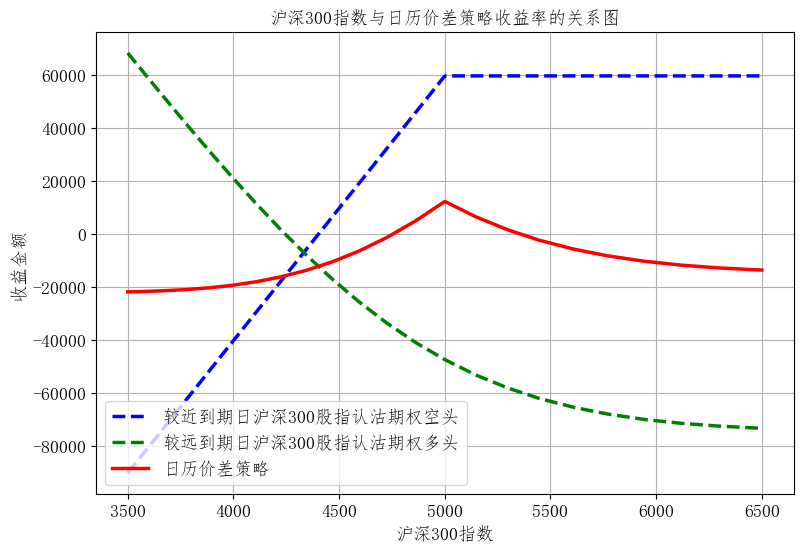

In [121]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_P1_short,'b--',label=u'较近到期日沪深300股指认沽期权空头',lw=2.5)
plt.plot(St,profit_P2_long,'g--',label=u'较远到期日沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_calendarpread,'r-',label=u'日历价差策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与日历价差策略收益率的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [122]:
K=4700
C=336.4
P=326.4
S0=4698.13
St=np.linspace(3000,6400,500)
N_C=1
N_P=1

In [123]:
profit_C_long=N_C*M*(np.maximum(St-K,0)-C)
profit_P_long=N_P*M*(np.maximum(K-St,0)-P)

In [124]:
profit_straddle=profit_C_long+profit_P_long

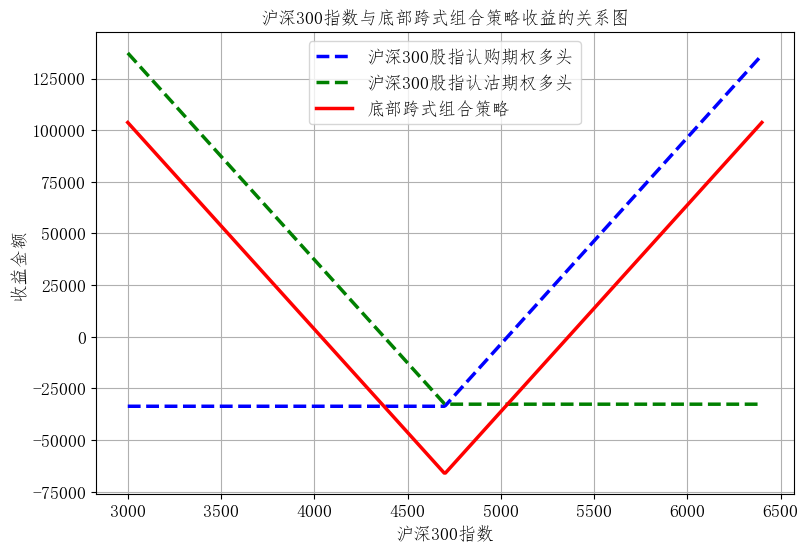

In [125]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C_long,'b--',label=u'沪深300股指认购期权多头',lw=2.5)
plt.plot(St,profit_P_long,'g--',label=u'沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_straddle,'r-',label=u'底部跨式组合策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与底部跨式组合策略收益的关系图',fontsize=13)
plt.legend(loc=9,fontsize=13) #图例放置在中上方
plt.grid()
plt.show()

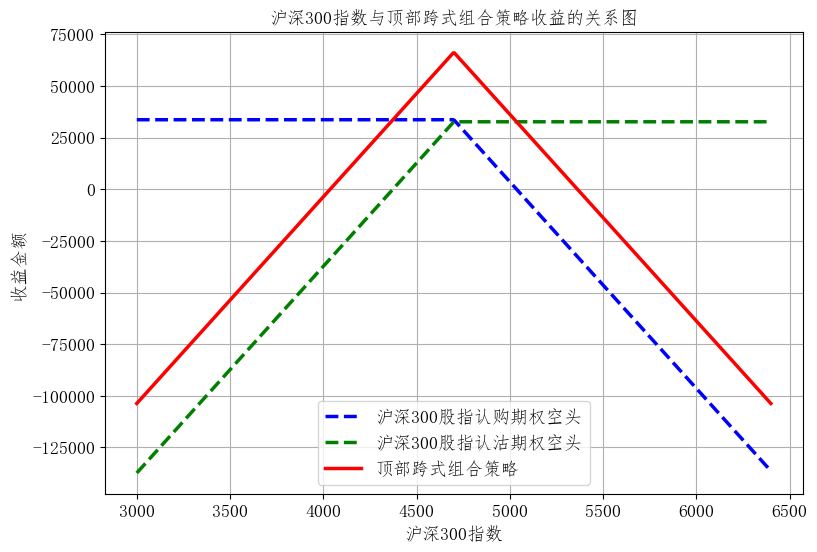

In [126]:
plt.figure(figsize=(9,6))
plt.plot(St,-profit_C_long,'b--',label=u'沪深300股指认购期权空头',lw=2.5)
plt.plot(St,-profit_P_long,'g--',label=u'沪深300股指认沽期权空头',lw=2.5)
plt.plot(St,-profit_straddle,'r-',label=u'顶部跨式组合策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与顶部跨式组合策略收益的关系图',fontsize=13)
plt.legend(loc=8,fontsize=13) #图例放置在中下方
plt.grid()
plt.show()

In [127]:
K=4600
C=290.0
P=387.0
S0=4635.71
St=np.linspace(3000,6200,500)
N1=1
N2=2

In [128]:
profit_C_strip=N1*M*(np.maximum(St-K,0)-C)
profit_P_strip=N2*M*(np.maximum(K-St,0)-P)

In [129]:
profit_strip=profit_C_strip+profit_P_strip

In [130]:
profit_C_strap=N2*M*(np.maximum(St-K,0)-C)
profit_P_strap=N1*M*(np.maximum(K-St,0)-P)

In [131]:
profit_strap=profit_C_strap+profit_P_strap

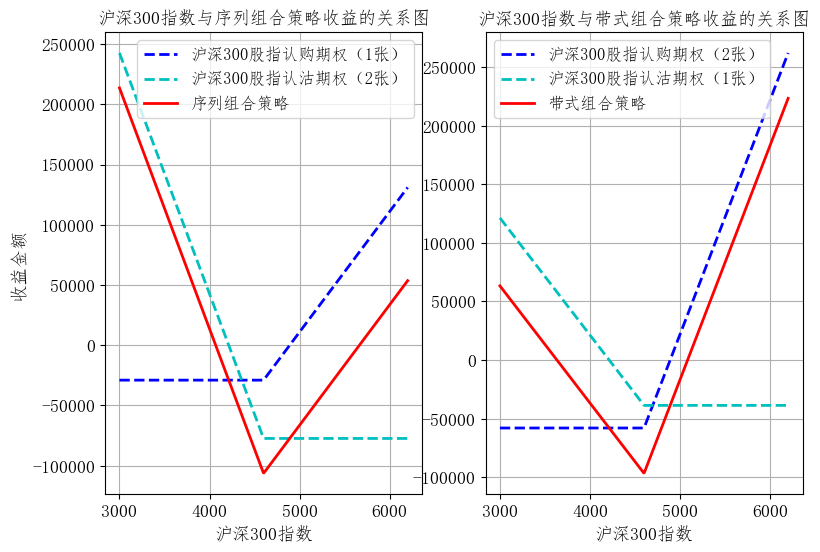

In [132]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(St,profit_C_strip,'b--',label=u'沪深300股指认购期权（1张）',lw=2.0)
plt.plot(St,profit_P_strip,'c--',label=u'沪深300股指认沽期权（2张）',lw=2.0)
plt.plot(St,profit_strip,'r-',label=u'序列组合策略',lw=2.0)
plt.xticks(fontsize=13)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.title(u'沪深300指数与序列组合策略收益的关系图',fontsize=13)
plt.legend(loc=0,fontsize=12)
plt.grid()
plt.subplot(1,2,2)
plt.plot(St,profit_C_strap,'b--',label=u'沪深300股指认购期权（2张）',lw=2.0)
plt.plot(St,profit_P_strap,'c--',label=u'沪深300股指认沽期权（1张）',lw=2.0)
plt.plot(St,profit_strap,'r-',label=u'带式组合策略',lw=2.0)
plt.xticks(fontsize=13)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与带式组合策略收益的关系图',fontsize=13)
plt.legend(loc=0,fontsize=12)
plt.grid()
plt.show()

In [133]:
K1=4500
K2=4700
P=417.4
C=305.0

In [134]:
profit_P_long=N_P*M*(np.maximum(K1-St,0)-P)
profit_C_long=N_C*M*(np.maximum(St-K2,0)-C)

In [135]:
profit_strangle=profit_P_long+profit_C_long

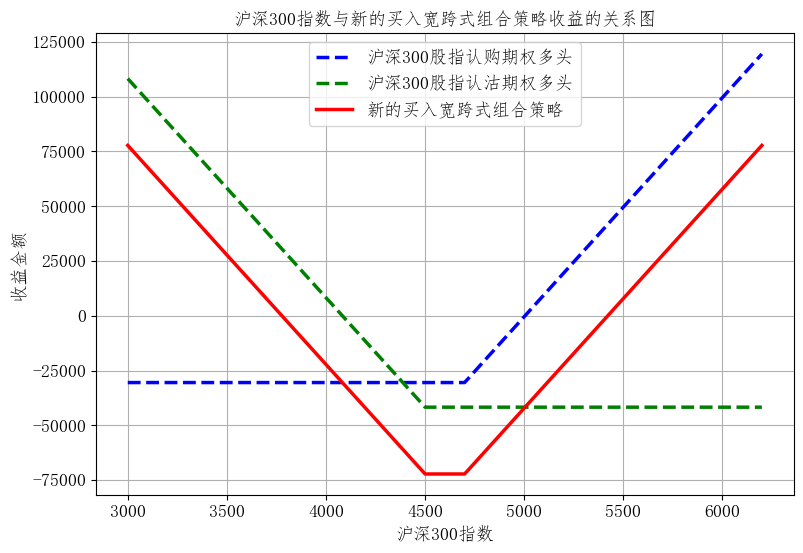

In [136]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C_long,'b--',label=u'沪深300股指认购期权多头',lw=2.5)
plt.plot(St,profit_P_long,'g--',label=u'沪深300股指认沽期权多头',lw=2.5)
plt.plot(St,profit_strangle,'r-',label=u'新的买入宽跨式组合策略',lw=2.5)
plt.xlabel(u'沪深300指数',fontsize=13)
plt.ylabel(u'收益金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'沪深300指数与新的买入宽跨式组合策略收益的关系图',fontsize=13)
plt.legend(loc=9,fontsize=13)
plt.grid()
plt.show()

In [137]:
K1=1.9 #较低期权行权价格
K2=2.0 #较高期权行权价格
C=0.0104 
P=0.0116

In [138]:
V1=K1-P-C #计算卖出宽跨式组合策略盈亏平衡的汇率临界值1
V2=K2+P+C #计算卖出宽跨式组合策略盈亏平衡的汇率临界值2

In [139]:
print('卖出宽跨式组合策略盈亏平衡的汇率临界值1：',round(V1,4))
print('卖出宽跨式组合策略盈亏平衡的汇率临界值2：',round(V2,4))

卖出宽跨式组合策略盈亏平衡的汇率临界值1： 1.878
卖出宽跨式组合策略盈亏平衡的汇率临界值2： 2.022


In [140]:
St=np.linspace(1.6,2.3,100)

In [142]:
profit_C_short=N_C*(C-np.maximum(St-K2,0))
profit_P_short=N_P*(P-np.maximum(K1-St,0))

In [143]:
profit_strangle_short=profit_C_short+profit_P_short

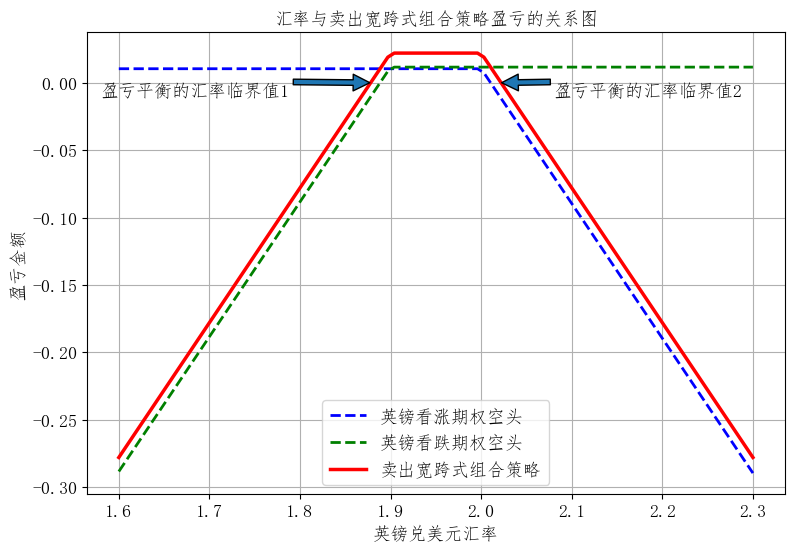

In [144]:
plt.figure(figsize=(9,6))
plt.plot(St,profit_C_short,'b--',label=u'英镑看涨期权空头',lw=2.0)
plt.plot(St,profit_P_short,'g--',label=u'英镑看跌期权空头',lw=2.0)
plt.plot(St,profit_strangle_short,'r-',label=u'卖出宽跨式组合策略',lw=2.5)
plt.xlabel(u'英镑兑美元汇率',fontsize=13)
plt.ylabel(u'盈亏金额',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'汇率与卖出宽跨式组合策略盈亏的关系图',fontsize=13)
plt.annotate(u'盈亏平衡的汇率临界值1',xy=(V1,0.0),xytext=(1.58,-0.01),arrowprops=dict(shrink=0.01),fontsize=13)
plt.annotate(u'盈亏平衡的汇率临界值2',xy=(V2,0.0),xytext=(2.08,-0.01),arrowprops=dict(shrink=0.01),fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [145]:
USD_GBP=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第13章/英镑兑美元的汇率（1991年）.xlsx',
                      sheet_name="Sheet1",header=0,index_col=0)

In [146]:
USD_GBP.index=pd.DatetimeIndex(USD_GBP.index) #将数据框的行索引转换为datetime格式

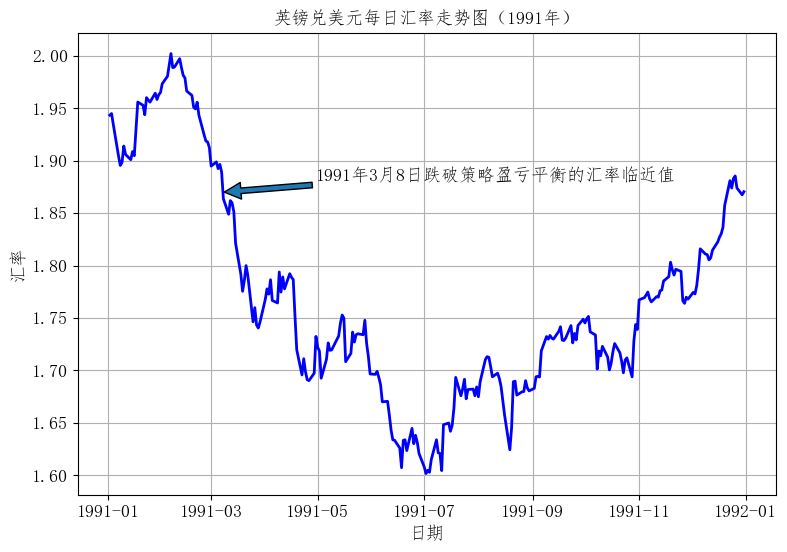

In [148]:
plt.figure(figsize=(9,6))
plt.plot(USD_GBP,'b-',lw=2.0)
plt.xlabel(u'日期',fontsize=13)
plt.ylabel(u'汇率',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'英镑兑美元每日汇率走势图（1991年）',fontsize=13)
plt.annotate(u'1991年3月8日跌破策略盈亏平衡的汇率临近值',xy=('1991-03-08',1.87),xytext=('1991-04-30',1.88),
             arrowprops=dict(shrink=0.01),fontsize=13)
plt.grid()
plt.show()